## Missing Values _ Feature Engineering   

# DAY [ 1 ] mean median mode 

### Why is data missing ?

#### data science Project -- DataSets should ne colleced from multiple source.

### Dealing with Missing Data : 
#### 1] Delete: You could simply delete the rows containing missing values.
#### 2] Replace with summary: This is probably the most commonly used imputation technique. Summarization here is the mean, mode, or median for a respective column.
#### 3] Random replace: You can also replace the missing values with a randomly picked value from the respective column.
#### 4] Using predictive model: This is an advanced technique. 

#### TYpe of missing data  - 
#### 1) Coutinuous type --   Timer Presenation(2.5 hr ,5.2 hr) , Clock, Hight(4.5 fit ) , age(with take as decimal formate)
#### 2 ) Discountinous Type data -  only Integer value vill cosinsider like counting , Agee(without take as decimal formate)
#### 3) Cotegpriacal data - 


#### what is misisng data - Missing completly at Random [MCAR] A variable is misisng completely at random MCAR if the probability of being missimg is the same fro all the obsevation . when data is MCAR there is absolutly no realtionship bet wenn data missing and any other value , Observe or missng , with the dataset , in other words , thos missing data points are random , There is nothing systematic going on that make data more liky missing than other.

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('C:\\Users\V_K\OneDrive\Documents\JupyterCodes\Ml_project_3\\Titanic_train.csv')

In [3]:
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## How to check ki kon si value missing hai ?

In [5]:
df[df['Embarked'].isnull() ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### absolutly no realtionship bet wenn data missing and any other value , Observe or missng , with the dataset , in other words , thos missing data points are random 

### Missing Data Not at Random (MNAR) systemaic

#### absolutly there is realtionship between data missing and any other value , Observe or missng , with the dataset , in other words , thos missing data points are random. 

In [6]:
import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0) 

In [7]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [8]:
import matplotlib.pyplot as plt


In [9]:
df.groupby('Survived')['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

#### First Data show whos people have been survived
#### Second line is who have been loss their life

### Missing at random [MAR]

#### Men ---- Hide theie salary
#### Women ---- Hide their age

### Intensionaly hidden!

#### Various way to handelling the missing the values
#### 1 ]  mean mdesim mode
#### 2 ]  Random Sample Impuation
#### 3 ]  Capturing Nan Value with new feature
#### 4 ]  End of Ditribution impuation
#### 5 ]  Arbirary Impuation
#### 6 ]  Frequent categorical impuation
#### 

### Mean/Median/Mode impuation - 

### When to apply mean median mode method - 
#### 1 ) Means /median impuation has the assumption that the data are missing completely at random
#### 2 ) we solve this by replacing by NAN with most frequenct occurance of variable.

In [10]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [11]:
df_selected = pd.read_csv('C:\\Users\V_K\OneDrive\Documents\JupyterCodes\Ml_project_3\\Titanic_train.csv' ,usecols = ['Age' , 'Fare','Survived'])

In [12]:
df_selected.keys()

Index(['Survived', 'Age', 'Fare'], dtype='object')

In [13]:
df_selected.isnull().sum()/df_selected.shape[0]*100
## or 
# df_selected.isnull().mean()*100   Both the line will same

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
imp_out = SimpleImputer(strategy='median')
imp_out.fit(df_selected)

imp_out.statistics_

X = imp_out.transform(df_selected)
Clean_Data = pd.DataFrame(X ,columns = df_selected.keys())
Clean_Data

,Survived,Age,Fare
0,0.0,22.0,7.2500
1,1.0,38.0,71.2833
2,1.0,26.0,7.9250
3,1.0,35.0,53.1000
4,0.0,35.0,8.0500
...,...,...,...
886,0.0,27.0,13.0000
887,1.0,19.0,30.0000
888,0.0,28.0,23.4500
889,1.0,26.0,30.0000


In [16]:
df['Age'].std()

14.526497332334042

In [17]:
imp_out.statistics_

array([ 0.    , 28.    , 14.4542])

In [18]:
import matplotlib.pyplot as plt

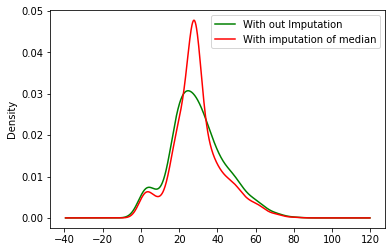

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde' ,ax= ax ,color ='g')
Clean_Data['Age'].plot(kind = 'kde' ,ax= ax ,color ='r')
lines ,lables = ax.get_legend_handles_labels()
lables = ['With out Imputation' ,'With imputation of median']
ax.legend(lines , lables ,loc = 'best')
plt.show()

#### Kernal Density Estimater  ===='kde'

### Plot should be move like green but due to impuation of median at the NaN value it provide red plot ,means after impuation of median

### The advabtage and disdavantage of mean median impuation -  
#### 1] easy to impliament
#### 2] Faster way toobtain the complete data set 
### Disadvantage
#### 1] change or distortion in the varience of data
#### 2] It impact the co-relation

## Random Sample impuation

# DAY [ 2 ]

#### Random Sample Imputer [Selction must be randomaly]
#### Aim = It take random slection of values from the data set and with help of these data use some mathematics and fill at NaN value

#### When it shoud be use - 
#### It assume that the data are missing completely random.


In [20]:
import pandas as pd

In [50]:
df_2 = pd.read_csv('C:\\Users\V_K\OneDrive\Documents\JupyterCodes\Ml_project_3\\Titanic_train.csv',usecols = ['Age' , 'Fare' , 'Parch' ])

In [51]:
print( df_2.isnull().mean() )
print(df_2[df.isnull()])

Age      0.198653
Parch    0.000000
Fare     0.000000
dtype: float64
     Age  Parch  Fare
0    NaN    NaN   NaN
1    NaN    NaN   NaN
2    NaN    NaN   NaN
3    NaN    NaN   NaN
4    NaN    NaN   NaN
..   ...    ...   ...
886  NaN    NaN   NaN
887  NaN    NaN   NaN
888  NaN    NaN   NaN
889  NaN    NaN   NaN
890  NaN    NaN   NaN

[891 rows x 3 columns]


In [52]:
df_2['Age'].isnull().sum()    # it Count all existing NaN value at edge

177

In [53]:
df_2['Age'].dropna().sample(df['Age'].isnull().sum() ,random_state = 0) # 

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

#### dropna will extract the Existing Numerical Vlaue(exept =NaN) in age and randomly genarate a value at place of NaN

In [54]:
def impute_nan(df, variable) :
    df_2[variable + '_median'] = df_2[variable].fillna(df.median())  # this line fill the median value at place of null
    df_2[variable + '_random'] = df_2[variable]       #  Which column have NaN take thoes column name
    ## ir will have random sample to fill nan
    random_sample = df_2[variable].dropna().sample(df_2[variable].isnull().sum() ,random_state = 0)
    ## Pandas need to have same index in order to merge the data set
    random_sample.index = df_2[df_2[variable].isnull()].index
    df_2.loc[df_2[variable].isnull(),variable + '_random'] = random_sample

In [55]:
df_age = impute_nan( df_2 , 'Age')
df_2.head()

,Age,Parch,Fare,Age_median,Age_random
0,22.0,0,7.2500,22.0,22.0
1,38.0,0,71.2833,38.0,38.0
2,26.0,0,7.9250,26.0,26.0
3,35.0,0,53.1000,35.0,35.0
4,35.0,0,8.0500,35.0,35.0


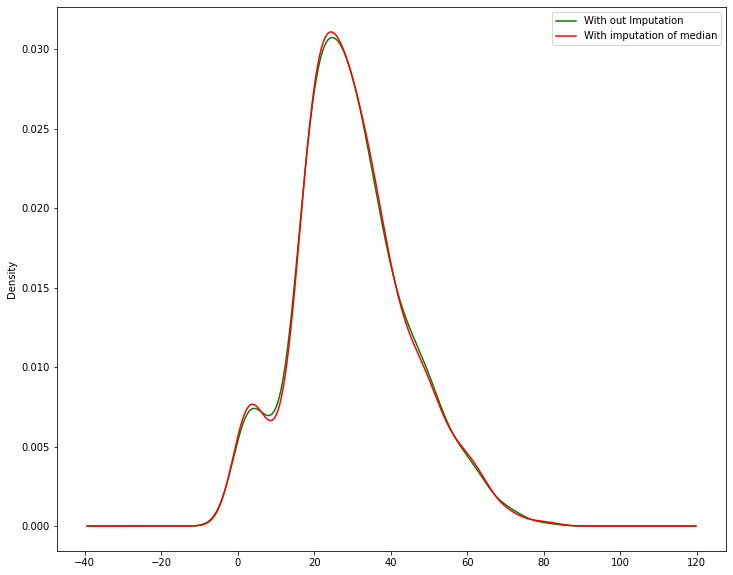

In [65]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(111)
df_2['Age'].plot(kind = 'kde' ,ax= ax ,color ='g')   # Age column taken from actual data set i.e. df_2
df_2['Age_random'].plot(kind = 'kde' ,ax= ax ,color ='r')   # AGe raken from new data set where age calculated randomly
lines ,lables = ax.get_legend_handles_labels()
lables = ['With out Imputation' ,'With imputation of median' ]
ax.legend(lines , lables ,loc = 'best')
plt.show()

#### WE can observe that there is no such as distortion happening in the variance bwn Actual data from with-out impurtion and with imputation

### Advatange of Random Imputation - 
####     1 ] Easy to impuation
####     2 ] Vey less distortion in variance 
### Disadvatnge - 
####     1 ] Every satuation randomness going to work
    

##  3 ] Capturing Nan Value with new feature

#### it work well if  If data is not missing completly at randomly

In [66]:
df_3 = df_2 = pd.read_csv('C:\\Users\V_K\OneDrive\Documents\JupyterCodes\Ml_project_3\\Titanic_train.csv',usecols = ['Age' , 'Fare' , 'Parch' ])

In [67]:
df_3

,Age,Parch,Fare
0,22.0,0,7.2500
1,38.0,0,71.2833
2,26.0,0,7.9250
3,35.0,0,53.1000
4,35.0,0,8.0500
...,...,...,...
886,27.0,0,13.0000
887,19.0,0,30.0000
888,NaN,2,23.4500
889,26.0,0,30.0000


In [69]:

df_3['Age_NaN'] = np.where(df['Age'].isnull(),1,0)  # Capturing Nan Value with new feature

In [71]:
df_3

,Age,Parch,Fare,Age_NaN
0,22.0,0,7.2500,0
1,38.0,0,71.2833,0
2,26.0,0,7.9250,0
3,35.0,0,53.1000,0
4,35.0,0,8.0500,0
...,...,...,...,...
886,27.0,0,13.0000,0
887,19.0,0,30.0000,0
888,NaN,2,23.4500,1
889,26.0,0,30.0000,0


In [73]:
df_3.isnull().sum()/df_3.shape[0]*100

Age        19.86532
Parch       0.00000
Fare        0.00000
Age_NaN     0.00000
dtype: float64

#### Value is  present mentioned as 0
#### values is not presen mentioned as 1

### Adavantages 
#### 1 ] Easy to implement
#### 2 ] Capturing the importence of missing values